### Image Classification using Keras Hub - Easy Level

This notebook demonstrates a basic image classification workflow using the CIFAR-10 dataset.  



In [ ]:
import os
os.environ["KERAS_BACKEND"] = "jax"

import keras
import keras_hub
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load CIFAR-10 dataset
dataset_name = "cifar10"
dataset, dataset_info = tfds.load(
    dataset_name,
    as_supervised=True,
    with_info=True
)
data_train, data_test = dataset["train"], dataset["test"]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.TAHQXD_3.0.2/cifar10-train.tfrecord*...:   0%|         …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/incomplete.TAHQXD_3.0.2/cifar10-test.tfrecord*...:   0%|          …

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [ ]:
data_train = data_train.take(500)
data_test = data_test.take(100)

In [ ]:
BATCH_SIZE = 64
IMAGE_SIZE = (160, 160)
NUM_CLASSES = dataset_info.features['label'].num_classes
import tensorflow as tf
def preprocess_inputs(image, label):
    image = tf.image.resize(image, IMAGE_SIZE)  # Resize using TF
    image = tf.cast(image, tf.float32) / 255.0  # Normalize
    label = tf.one_hot(label, NUM_CLASSES)     # One-hot encode labels
    return image, label


In [ ]:
data_train = data_train.map(preprocess_inputs).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
data_test = data_test.map(preprocess_inputs).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [ ]:
# Load ResNetV2-50 model from Keras Hub
classifier = keras_hub.models.ImageClassifier.from_preset("resnet_v2_50_imagenet", num_classes=NUM_CLASSES)

# Compile the model
classifier.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

100%|██████████| 840/840 [00:00<00:00, 1.98MB/s]


100%|██████████| 3.54k/3.54k [00:00<00:00, 6.23MB/s]


In [ ]:
# Train the model
history = classifier.fit(data_train, validation_data=data_test, epochs=8)


Epoch 1/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 672ms/step - accuracy: 0.1242 - loss: 9.4736 - val_accuracy: 0.0900 - val_loss: 7.2812
Epoch 2/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 485ms/step - accuracy: 0.1313 - loss: 7.6169 - val_accuracy: 0.0900 - val_loss: 8.8360
Epoch 3/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 486ms/step - accuracy: 0.1226 - loss: 7.0553 - val_accuracy: 0.1400 - val_loss: 8.7014
Epoch 4/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 538ms/step - accuracy: 0.1219 - loss: 6.7646 - val_accuracy: 0.0800 - val_loss: 8.3312
Epoch 5/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 651ms/step - accuracy: 0.1219 - loss: 8.4311 - val_accuracy: 0.0900 - val_loss: 7.8426
Epoch 6/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 532ms/step - accuracy: 0.1219 - loss: 9.8448 - val_accuracy: 0.0900 - val_loss: 7.8987
Epoch 7/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 463ms/step - accuracy: 0.1219 - loss: 9.8854 - val_accuracy: 0.0900 - val_loss: 8.3924
Epoch 8/8
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 670ms/step - accuracy: 0.1204 - loss: 10.5858 - val_accuracy: 0.0900 - val_loss: 8.3975

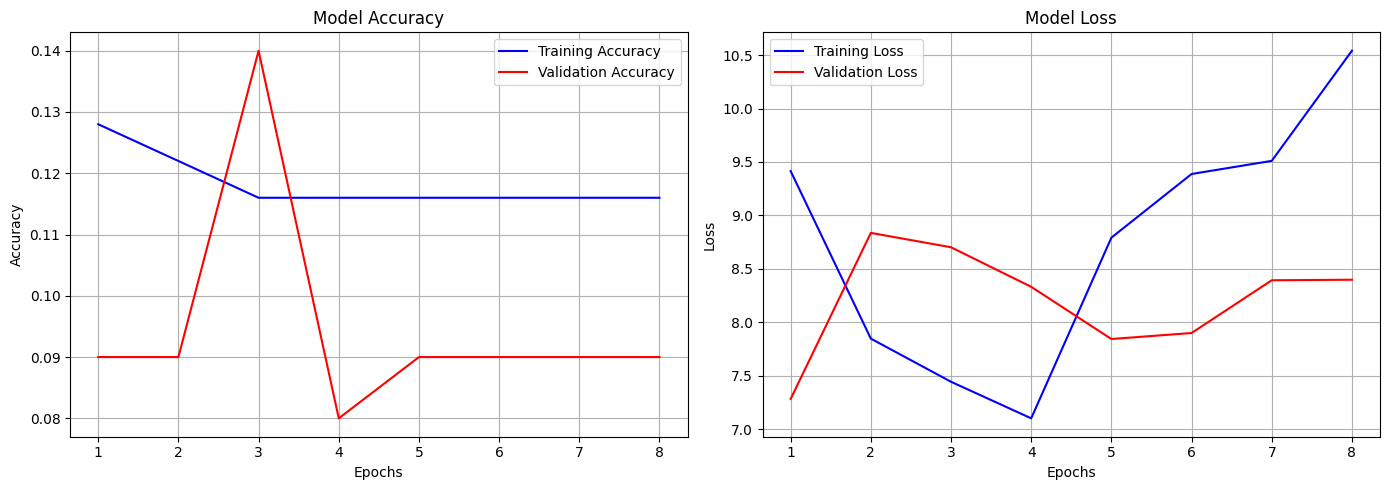

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history.get('val_accuracy')
    loss = history.history['loss']
    val_loss = history.history.get('val_loss')
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training Accuracy')
    if val_acc:
        plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    if val_loss:
        plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_training_history(history)
